In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=50,n_features=5)

In [18]:
X

array([[ 1.37326673e-01,  5.21457785e-01, -7.02000992e-01,
         1.29326586e+00,  1.23210522e+00],
       [-6.53658749e-01,  1.10812874e+00,  2.60377541e-01,
         8.59853968e-01,  4.71780301e-01],
       [-9.61949796e-02,  2.16357800e-01, -5.64612848e-01,
         6.12343690e-01,  1.74397498e+00],
       [ 4.85388818e-01, -4.09595578e-01, -1.61685200e+00,
         2.06650643e-01,  1.38614579e-01],
       [ 1.72391586e+00, -6.80653799e-01,  5.10540783e-01,
         1.49152956e+00, -3.62809751e-01],
       [-1.17979239e+00,  2.78204781e+00, -8.24830460e-01,
        -8.85928822e-01, -8.39159502e-01],
       [-3.53014401e-01, -1.02062062e+00, -7.07556663e-01,
        -1.86093371e+00, -1.41768574e+00],
       [-7.09362026e-01, -1.33060970e+00,  1.41815307e+00,
        -3.47948857e-01,  2.31840393e-01],
       [-2.46187708e+00,  1.83522181e+00,  1.89557076e-01,
        -9.61671568e-01, -7.96922529e-01],
       [-1.12594850e+00,  4.72352173e-01, -1.80951603e+00,
        -5.91279164e-02

In [19]:
X=pd.DataFrame(X)

In [20]:
X.head()

,0,1,2,3,4
0,0.137327,0.521458,-0.702001,1.293266,1.232105
1,-0.653659,1.108129,0.260378,0.859854,0.471780
2,-0.096195,0.216358,-0.564613,0.612344,1.743975
3,0.485389,-0.409596,-1.616852,0.206651,0.138615
4,1.723916,-0.680654,0.510541,1.491530,-0.362810


In [6]:
y[:5]

array([ -78.33405848, -395.93542481,   -5.25204341,  156.68604714,
         16.3178543 ])

In [10]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [21]:
fs=SelectKBest(score_func=mutual_info_regression,k=3)
fs.fit(X,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x000001F71C8BAAC0>)

In [12]:
fs.scores_

array([0.09364078, 0.02963972, 0.17688098, 0.19755966, 0.09929939])

In [27]:
mi_score = pd.Series(fs.scores_,index=X.columns )

In [28]:
mi_score

0    0.295136
1    0.000000
2    0.142312
3    0.000000
4    0.236804
dtype: float64

<Axes: >

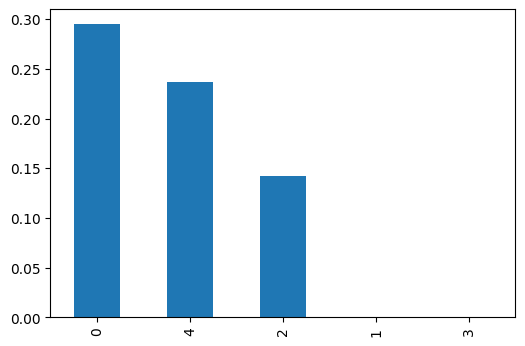

In [30]:
mi_score.sort_values(ascending=False) . plot.bar(figsize=(6,4))

In [31]:
X_selected= fs.fit_transform(X,y)
X_selected=pd.DataFrame(X_selected)

In [32]:
X_selected.head()

,0,1,2
0,0.137327,-0.702001,1.232105
1,-0.653659,0.260378,0.471780
2,-0.096195,-0.564613,1.743975
3,0.485389,-1.616852,0.138615
4,1.723916,0.510541,-0.362810


In [34]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [37]:
X, y = make_regression(n_samples=50, n_features=5,n_informative=2)
X = pd.DataFrame(X)

In [38]:
X.head()

,0,1,2,3,4
0,0.983552,0.878351,-0.719594,0.255891,-0.005075
1,-0.745819,-1.818345,-0.789885,2.854792,-0.049419
2,1.431553,0.105483,0.991951,-0.630336,-1.298618
3,-0.496372,-1.007507,1.147264,-0.094832,0.005429
4,-0.674361,1.689958,-0.157445,0.683677,0.734257


In [50]:
y[:5]

array([  70.12019401, -130.38325393,   23.46391976,  -73.19475279,
        105.5148305 ])

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))


In [ ]:
selected_X = fs.fit_transform(X,y)
selected_X = pd.DataFrame(selected_X)